# 32.DFS1

### ABC213D Dif:710
url : https://atcoder.jp/contests/abc213/tasks/abc213_d

### [概要]
DFSはdepth first searchの略で日本語だと「深さ優先探索」という。グラフを探索するアルゴリズ  
ムの一つ。  
BFSと並べて説明されることが多いDFSだが、再帰関数を使う分実装難易度はDFSのほうが高  
い。本問は茶色DifであるがDFSを使う問題は緑Difになることが多く、その分できるようになれば  
レーティングをぐんと上げることができる。まずはこの問題でDFS、再帰関数の基礎をしっかり身  
につけよう。  
### [解説]
【ゆっくり解説】DFS(深さ優先探索)解説 ABC213 D 【競技プログラミング】  
https://www.youtube.com/watch?v=VUoZ_WU90sM  

「DFS(深さ優先探索)」  
Depth First Searchの略。  
グラフや木構造を探索するためのアルゴリズムの一つで、探索を開始する頂点から先に進める  
だけ進み、戻るという手順を繰り返す。  
実装には再帰関数を使うことが多い。  
具体的な手順は以下  
(1)入力を受け取る  
(2)小さい順から回るためにある都市から進める都市の番号をソートしておく  
(3)問題文の指示どおりに都市を進んで都市の番号を記録していく。  
DFSの実装には再帰関数を使う。詳細は【実装のコツ】を見てほしい。  

### [実装のコツ]
<道路の情報の受け取り>
A,Bの情報を受け取る時、どの都市からどの都市へ行けるか？という情報を記録していく必要が  
ある。これは二次元配列として記録する。  
ひとまず(N+1)個のリストを入れたリスト、connectを用意する。  
```
# 道路の情報受け取りリスト
connect=[[] for i in range(N+1)]
```
a,bを受け取ったらconnect[a]に「b」、connect[b]に「a」を追加していく。
```
# 道路の情報を受け取って格納
for i in range(M):
    A,B=map(int, input().split())
    connect[A].append(B)
    connect[B].append(A)
```
これでいける都市が確認できる。例えば都市①から都市②,③,④に行きたい場合は  
connect[1] = [2,3,4]  
となっている  

<再帰関数>  
再帰関数は関数の中で同じ関数を呼び出すという処理を行うこと。本問では都市を順に回るとい  
う部分で再帰関数を使う。  
具体的なコードは以下。  
```
# DFS(今いる都市,前にいた都市)
def DFS(now,pre):
    # 今いる都市を答えに入れる
    ans.append(now)
    # to=今いる都市から行ける都市
    for to in connect[now]:
        # もしtoが前にいた都市と違うなら
        if to!=pre:
            # 更に先へ探索する
            DFS(to,now)
            # 戻ってきたら答えへ格納
            ans.append(now)
```
DFSという関数の中でDFSを更に呼び出しているのがわかると思う。関数が再度呼び出された場  
合は処理を中断し、スタックと呼ばれるものに一時的に格納される。  
例で再帰関数の挙動を確認しよう。  

～例～  
N：4  
A1 B1：1 2  
A2 B2：4 2  
A3 B3：3 1  
まずは図を描いてみる。  
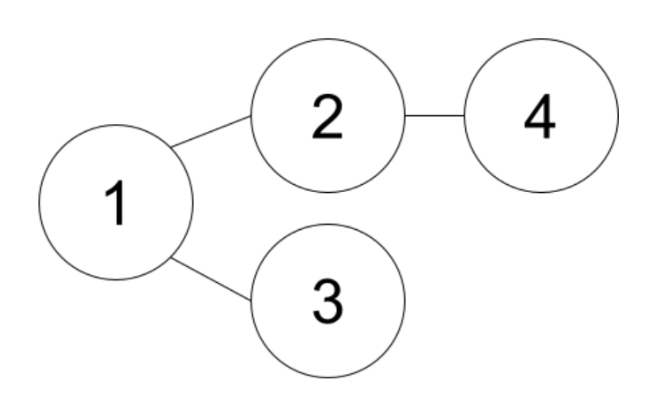  

DFSは(今いる都市,前いた都市)を引数とする。  
スタートは都市①だが前いた都市はない。よって前いた都市は存在しない番号「-1」としてDFSを  
始める。  
DFS(1,-1)  
まず今いる都市①が答えに記録される。  
次に都市①から行ける都市②、都市③について処理する。  
・都市②  
都市②は前にいた都市(-1)と違うため、DFS(2,1)が始まる。  
関数の中で新しい関数が始まったので、DFS(1,-1)はスタックに積まれ、一旦待機状態になる。  
答え：①  
スタック：[DFS(1,-1)]  
DFS(2,1)  
今いる都市②が答えに記録される。  
都市②から行ける都市①、都市④について処理する。  
・都市①  
都市①は前いた都市であるから無視。  
・都市④  
DFS(4,2)が始まる。DFS(2,1)はスタックに積まれ、待機状態となる。  
答え：①,②  
スタック：[DFS(2,1),DFS(1,-1)]  
※スタックは新しい要素が入った時、キューと違って末尾ではなく先頭へ追加する。  
DFS(4,2)  
今いる都市④が答えに記録される。  
都市④から行ける都市②について処理する  
・都市④  
都市②は前いた都市であるから無視。他に都市④から行ける都市はないからDFS(4,2)は終  
了。  
答え：①,②,④  
スタック：[DFS(2,1),DFS(1,-1)]  
DFS(4,2)が終了したので、スタックからDFS(2,1)を取り出し、中断したところから再開する。  
DFS(2,1)(続き)  
答えに都市②を記録する。  
これでDFS(2,1)も終了  
答え：①,②,④,②  
スタック：[DFS(1,-1)]  
更にスタックからDFS(1,-1)を取り出す。  
DFS(1,-1)(続き)  
答えに都市①を記録する。  
都市①からは都市③へも行ける。都市③について処理を開始する。  
・都市③  
DFS(3,1)が始まる。DFS(1,-1)は再びスタックに積まれ、待機状態となる。  
答え：①,②,④,②,①  
スタック：[DFS(1,-1)]  
DFS(3,1)  
答えに都市③を記録する。  
都市③から行ける都市①について処理する。  
・都市①  
都市①は前いた都市であるから無視。他に都市③から行ける都市はないからDFS(3,1)は終  
了。  
答え：①,②,④,②,①,③  
スタック：[DFS(1,-1)]  
DFS(3,1)が終了。再びスタックからDFS(1,-1)を取り出し、再開する。  
DFS(1,-1)(続き)  
答えに都市①を記録する。  
これでDFS(1,-1)が終了し、処理がすべて完了する。  
答え：①,②,④,②,①,③,①  

<再帰回数上限の設定>
再帰関数を書くとき、必ず最初に以下を書くと覚えてほしい。
```
# 再起回数上限を10^6へ変更
import sys
sys.setrecursionlimit(10**6)
```
これは再帰回数(スタックに積める個数)を変更するもの。デフォルト値は1000なのだが競プロだ
とこれを超える場合があり、RE(実行時エラー)となってしまう。


In [ ]:
#再起回数上限。再起関数を書くときは必ず最初に書くこと。
import sys
sys.setrecursionlimit(10**6)
#入力
N = int(input())
#道路の情報を受け取るリスト(ここのN+1は最初の0を使わないが、インデックスを参照するときに便利なためにそうしている)
connect = [[] for i in range(N+1)]
for i in range(N-1):
    A,B = map(int,input().split())
    connect[A].append(B)
    connect[B].append(A)
#小さい順に回るためにソート
for i in range(N+1):
    connect[i].sort()
#答えのの格納リスト
ans = []

#DFS(今いる都市、前にいた都市)
def DFS(now, pre):
    #今いる都市を答えに入れる
    ans.append(now)
    #to = 今いる都市からいける都市
    for to in connect[now]:
        #もしtoが前にいた都市と違うなら
        if to != pre:
            #更に先へ探索する
            DFS(to,now)
            #戻ってきたら答えへ格納
            ans.append(now)

#最初の都市=1, 前にいた都市 = -1 (前にいた都市がないので存在しない番号)としてスタート
DFS(1,-1)

print(*ans)